<a href="https://colab.research.google.com/github/GuilhermeBarreta/datasets/blob/main/tarefa6_MPCC_Guilherme_Augusto_Barreta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Explorando os dados do artigo "Big Data analytics in Agile software development A systematic mapping"

##1.1 Carregando e Tratando os dados

primeiramente importamos os dados.

In [72]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/GuilhermeBarreta/datasets/main/Mapping_Study-BDA_in_ASD.csv'
df = pd.read_csv(url, sep =';')

carregando o matplotlib para plotar os gráficos.

In [73]:
import matplotlib.pyplot as plt

obtendo o número de autores por artigo e renomeando as colunas de ano e afiliação



In [74]:
import re #biblioteca de expressões regulares
df['num_autores'] = df['RQ 1.3 Country'].map(lambda txt: sum([int(i) for i in re.findall(r'\b\d+\b',txt)]))
df= df.rename(columns={'RQ 1.4 Author\'s affiliation':'Afiliação','RQ 1.1 Year':'Ano'}, inplace = False)

##1.2 Boxplot

tratando os valores para o boxplot

In [75]:
bxpt_df = df.loc[:,['num_autores','Afiliação']]
total = df.loc[:,['num_autores','Afiliação']]
total['Afiliação'] = 'Total'
bxpt_df = bxpt_df.append(total)
labels = ['Total', 'Academic', 'Industry','Both']
#bxpt_df.boxplot(column = ['num_autores'], by =['afiliação'], figsize = (15,7))
dataset  = np.array([
                     [n for n, a in zip(bxpt_df['num_autores'], bxpt_df['Afiliação'])
                     if a==l]
                     for l in labels
                    ], dtype=object)

plotagem do boxplot

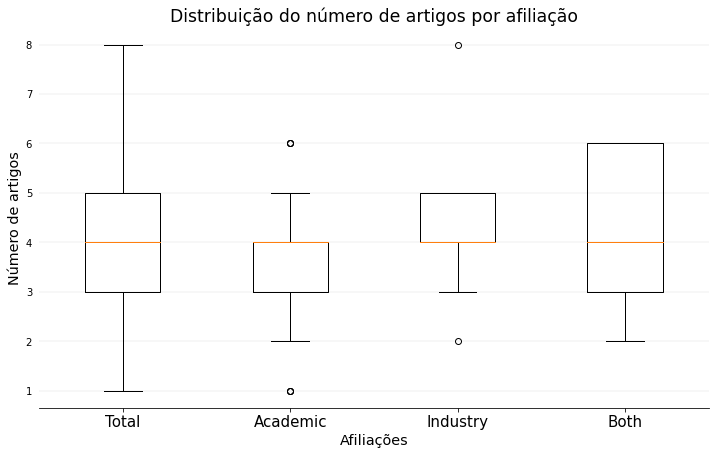

In [76]:
# Visualizar distribuição do número de artigos por afiliação
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribuição do número de artigos por afiliação', fontsize='xx-large')
#ax.set_xticks(np.arange(0,len(labels)), labels)
ax.xaxis.set_tick_params(labelsize=15)
plt.xlabel('Afiliações', fontsize='x-large')
plt.ylabel('Número de artigos', fontsize='x-large')
ax.boxplot(dataset, labels=labels)
plt.show()



Esse Boxplot informa a distribuição de artigos por afiliação de autores. É possível intepretar que os artigos da área Industrial envolve mais autores do que da área acadêmica. Na média geral, um artigo envolve 4 autores.

##1.3 Gráfico de Barras

Tratando os dados para o gráfico de barra.

In [77]:
df['count_id'] = 1
bar_df = df.groupby(by=['Ano','Afiliação']).sum('count_id')
bar_df = bar_df.reset_index()
anos_complementares = pd.DataFrame([
                                    {'Ano':i, 'Afiliação':j, 'count_id':0} 
                                    for i in bar_df['Ano'].unique() 
                                    for j in bar_df['Afiliação'].unique() 
                                    if (i,j) not in zip(bar_df['Ano'], bar_df['Afiliação'])])
bar_df = bar_df.append(anos_complementares).reset_index().sort_values(by=['Afiliação', 'Ano'])

plotagem do gráfico de barra.

Text(0, 0.5, 'Número de artigos')

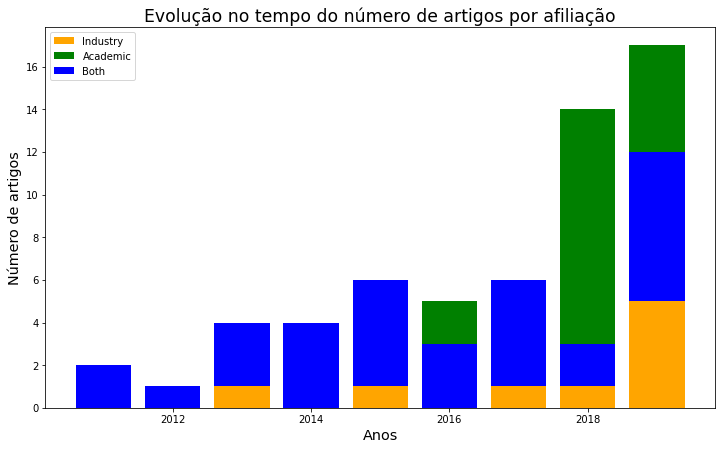

In [78]:

fig, ax = plt.subplots(figsize=(12, 7))
X = list(bar_df['Ano'].unique())
Y1 = bar_df[bar_df['Afiliação']=='Industry']['count_id']
Y2 = bar_df[bar_df['Afiliação']=='Academic']['count_id']
Y3 = bar_df[bar_df['Afiliação']=='Both']['count_id']

ax.bar(X, Y1, label='Industry', color='orange')
ax.bar(X, Y2, label='Academic', color='green', bottom=Y1)
ax.bar(X, Y3, label='Both', color='blue', bottom=Y1)
ax.set_title('Evolução no tempo do número de artigos por afiliação', fontsize='xx-large')
ax.legend(loc='upper left')
plt.xlabel('Anos', fontsize='x-large')
plt.ylabel('Número de artigos', fontsize='x-large')

Esse gráfico de barra informa a Evolução do número de artigos por afiliação ao longo dos anos. É possível interpretar que o número total de artigos tende a aumentar. No entanto o mesmo não ocorre por afiliação, podendo aumentar como diminuir.